# DLlib neural network example: regression problem

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

from dllib.metrics.regression import MeanSquaredError
from dllib.layers import Linear, Sigmoid, ReLu
from dllib.model import SequentialNN
from dllib.optimizers import SGD
from examples.backend import fit_and_evaluate, DataCatalogue, ModelType, SklearnRegressionWrapper

## Linear problem

In [3]:
from sklearn.model_selection import train_test_split

DATA_SETTINGS = {
    "n_samples": 100,
    "n_features": 3,
    "n_informative": 2,
    "n_targets": 1,
    "bias": 0.0,
    "noise": 10,
}

X, y = make_regression(**DATA_SETTINGS)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

dataset = DataCatalogue(
    model_type=ModelType.REGRESSION,
    train={"X": X_train, "y": y_train},
    test={"X": X_test, "y": y_test},
)

### Logistic regression

In [4]:
evaluation = {}

linear_regression_results = fit_and_evaluate(
    LinearRegression(), 
    dataset,
)
evaluation.update(linear_regression=linear_regression_results)

### Dllib Neural network

In [5]:
nn = SequentialNN(
    layers=[
        Linear(input_size=X.shape[1], output_size=1),
    ],
    loss=MeanSquaredError(),
    optimizer=SGD(learning_rate=1e-2)
)

dataset = DataCatalogue(
    model_type=ModelType.REGRESSION,
    train={"X": X_train, "y": y_train},
    test={"X": X_test, "y": y_test},
)

neural_network_results = fit_and_evaluate(
    SklearnRegressionWrapper(nn), 
    dataset, 
    estimator__epochs=500,
    estimator__batch_size=16,
    estimator__verbose=False,
)
evaluation.update(neural_network=neural_network_results)

### Model comparison

In [6]:
pivoted_evaluation = {
    model: {
        f"{metric_type}_{phase}": value 
        for phase, metrics in phases.items() 
        for metric_type, value in metrics.items()
    } 
    for model, phases in evaluation.items() 
}

df_evaluation = pd.DataFrame(pivoted_evaluation)
df_evaluation

,linear_regression,neural_network
R2_train,0.979486,0.979483
MSE_train,117.161455,117.179690
MAE_train,8.751467,8.747586
R2_test,0.990758,0.990780
MSE_test,98.884786,98.645270
MAE_test,7.682903,7.685224


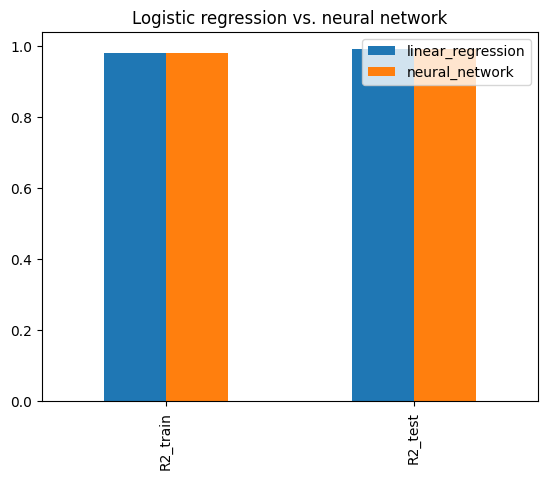

In [7]:
_ = df_evaluation.loc[["R2_train", "R2_test"], :].plot.bar(title="Logistic regression vs. neural network")

## Non-linear problem

In [8]:
X, y = make_regression(**DATA_SETTINGS)
y = 1e-4 * y ** 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

dataset = DataCatalogue(
    model_type=ModelType.REGRESSION,
    train={"X": X_train, "y": y_train},
    test={"X": X_test, "y": y_test},
)

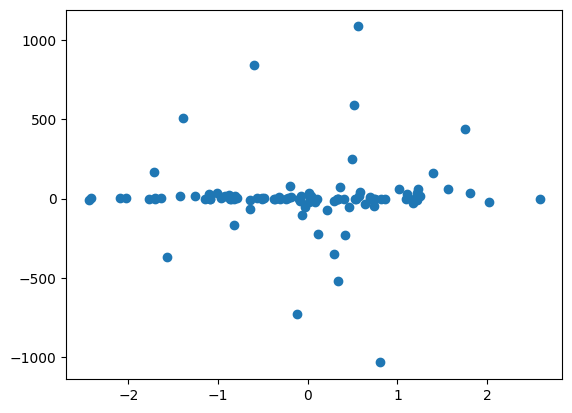

In [9]:
plt.scatter(X[:, 1], y)

### Logistic regression

In [10]:
evaluation = {}

linear_regression_results = fit_and_evaluate(
    LinearRegression(), 
    dataset,
)
evaluation.update(linear_regression=linear_regression_results)

### Dllib Neural network

In [11]:
nn = SequentialNN(
    layers=[
        Linear(input_size=X.shape[1], output_size=16),
        ReLu(),
        Linear(input_size=16, output_size=1),
    ],
    loss=MeanSquaredError(),
    optimizer=SGD(learning_rate=1e-3)
)


neural_network_results = fit_and_evaluate(
    SklearnRegressionWrapper(nn), 
    dataset, 
    estimator__epochs=2000,
    estimator__batch_size=16,
    estimator__verbose=False,
)
evaluation.update(neural_network=neural_network_results)

### Model comparison

In [12]:
pivoted_evaluation = {
    model: {
        f"{metric_type}_{phase}": value 
        for phase, metrics in phases.items() 
        for metric_type, value in metrics.items()
    } 
    for model, phases in evaluation.items() 
}

df_evaluation = pd.DataFrame(pivoted_evaluation)
df_evaluation

,linear_regression,neural_network
R2_train,0.720266,0.997963
MSE_train,18380.349078,133.833133
MAE_train,103.544547,6.352305
R2_test,-0.652847,0.965169
MSE_test,12474.342908,262.877686
MAE_test,102.289960,9.652576


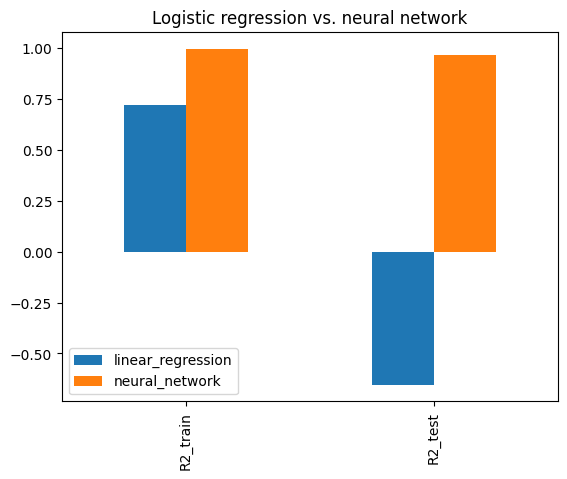

In [13]:
_ = df_evaluation.loc[["R2_train", "R2_test"], :].plot.bar(title="Logistic regression vs. neural network")